## Module 4: Find the best text classification model for the sentimental analysis

Exercise related to material in [AH2179-Exercise 4](https://github.com/zhenliangma/Applied-AI-in-Transportation/tree/main/Exercise_4_Text_classification).






In [50]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# %matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
sns.set(font_scale=0.5)
import matplotlib.pyplot as plt

In [2]:
# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'
df = pd.read_csv(url)
df = df.drop_duplicates()

In [62]:
# Plotting the ROC Curve
def plot_roc_curve(model, y_pred, y_test, ax, ax0, ax1, vect_string):

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)

  ax[ax0, ax1].plot(fpr, tpr, label=str(f'{model}'.split('(')[0])+ f'(AUC = {roc_auc:.2f})')
  ax[ax0, ax1].set_xlabel('False Positive Rate (FPR)')
  ax[ax0, ax1].set_ylabel('True Positive Rate (TPR)') if ax1 != 0 else ax[ax0, ax1].set_ylabel('False Positive Rate (FPR) - ' + vect_string)
  ax[ax0, ax1].legend(loc='lower right')

In [64]:
# Training/Testing Split
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [65]:
# Defining vectorizers & models

#-*-*-*-*-*-*vectorizers-*-*-*-*-*-*
#(1) CountVectorizer
vectorizer_count = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

#(2) #HashingVectorizer
vectorizer_hash = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

#-*-*-*-*-*-*models and param_grids-*-*-*-*-*-*
#(1)LR
model_lr = LogisticRegression(max_iter=1000, random_state=0)
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

#(2)KNN
model_knn =KNeighborsClassifier()
param_grid_kn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

#(3)RF
model_rf = RandomForestClassifier(random_state=0)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#(4)XGBoost
model_xgboost =  XGBClassifier()
param_grid_xgboost = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}


#(5)SVM
model_svm = SVC(probability=True)
param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
}

#(6)Naïve Bayes models
model_bayes =BernoulliNB()
param_grid_bayes = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}

In [68]:
# Lists for looping
vectorizers = [vectorizer_count, vectorizer_hash, vectorizer_tfidf]
models = [model_lr, model_knn, model_rf, model_xgboost, model_svm, model_bayes]
param_grids = [param_grid_lr, param_grid_kn, param_grid_rf, param_grid_xgboost, param_grid_svm, param_grid_bayes]

{'C': 1}
{'n_neighbors': 5, 'weights': 'uniform'}
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
{'C': 10, 'kernel': 'rbf'}
{'alpha': 1, 'force_alpha': True}
{'C': 10}
{'n_neighbors': 9, 'weights': 'uniform'}
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
{'C': 10, 'kernel': 'rbf'}
{'alpha': 1, 'force_alpha': True}
{'C': 0.1}
{'n_neighbors': 5, 'weights': 'distance'}
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
{'C': 0.1, 'kernel': 'rbf'}
{'alpha': 1, 'force_alpha': True}


,Model,Vectorizer,Parameters,Accuracy,Precision,Recall,F1
9,XGBClassifier,HashingVectorizer,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.971292,0.994924,0.946860,0.970297
14,RandomForestClassifier,TfidfVectorizer,"{'max_depth': 30, 'min_samples_leaf': 1, 'min_...",0.971292,0.985075,0.956522,0.970588
8,RandomForestClassifier,HashingVectorizer,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.971292,0.975610,0.966184,0.970874
10,SVC,HashingVectorizer,"{'C': 10, 'kernel': 'rbf'}",0.971292,0.985075,0.956522,0.970588
15,XGBClassifier,TfidfVectorizer,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.971292,0.980296,0.961353,0.970732
2,RandomForestClassifier,CountVectorizer,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.964115,0.980000,0.946860,0.963145
3,XGBClassifier,CountVectorizer,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.959330,0.979798,0.937198,0.958025
16,SVC,TfidfVectorizer,"{'C': 0.1, 'kernel': 'rbf'}",0.959330,0.970297,0.946860,0.958435
4,SVC,CountVectorizer,"{'C': 10, 'kernel': 'rbf'}",0.956938,0.979695,0.932367,0.955446
7,KNeighborsClassifier,HashingVectorizer,"{'n_neighbors': 9, 'weights': 'uniform'}",0.954545,0.960784,0.946860,0.953771


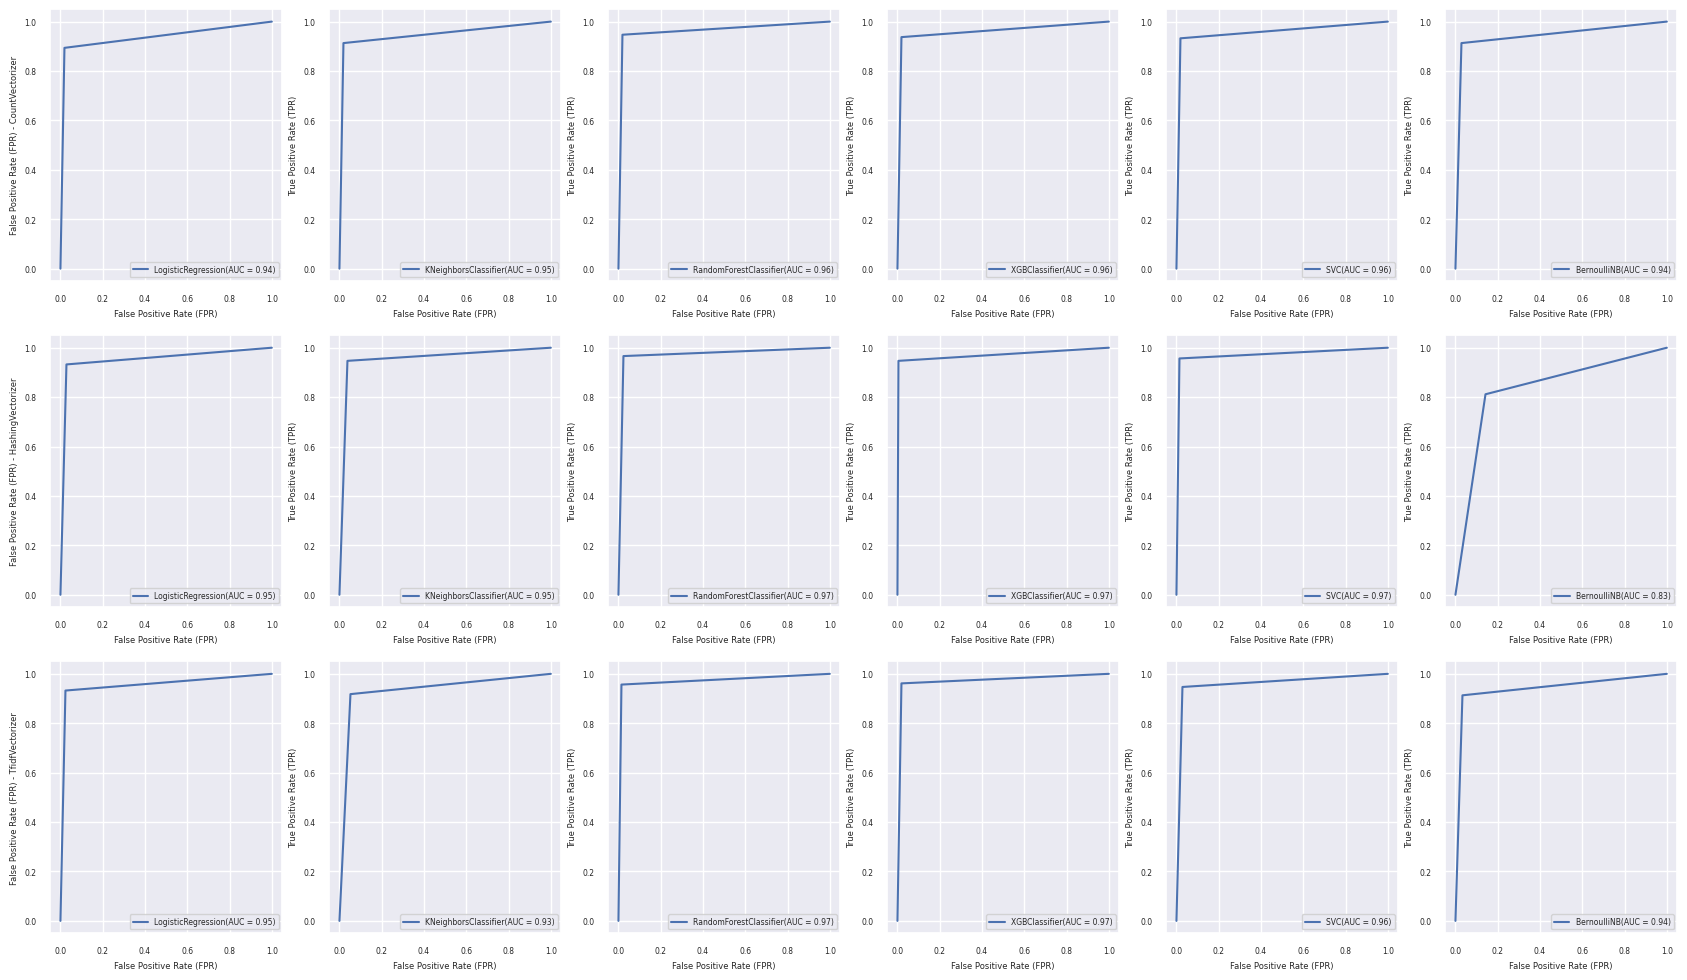

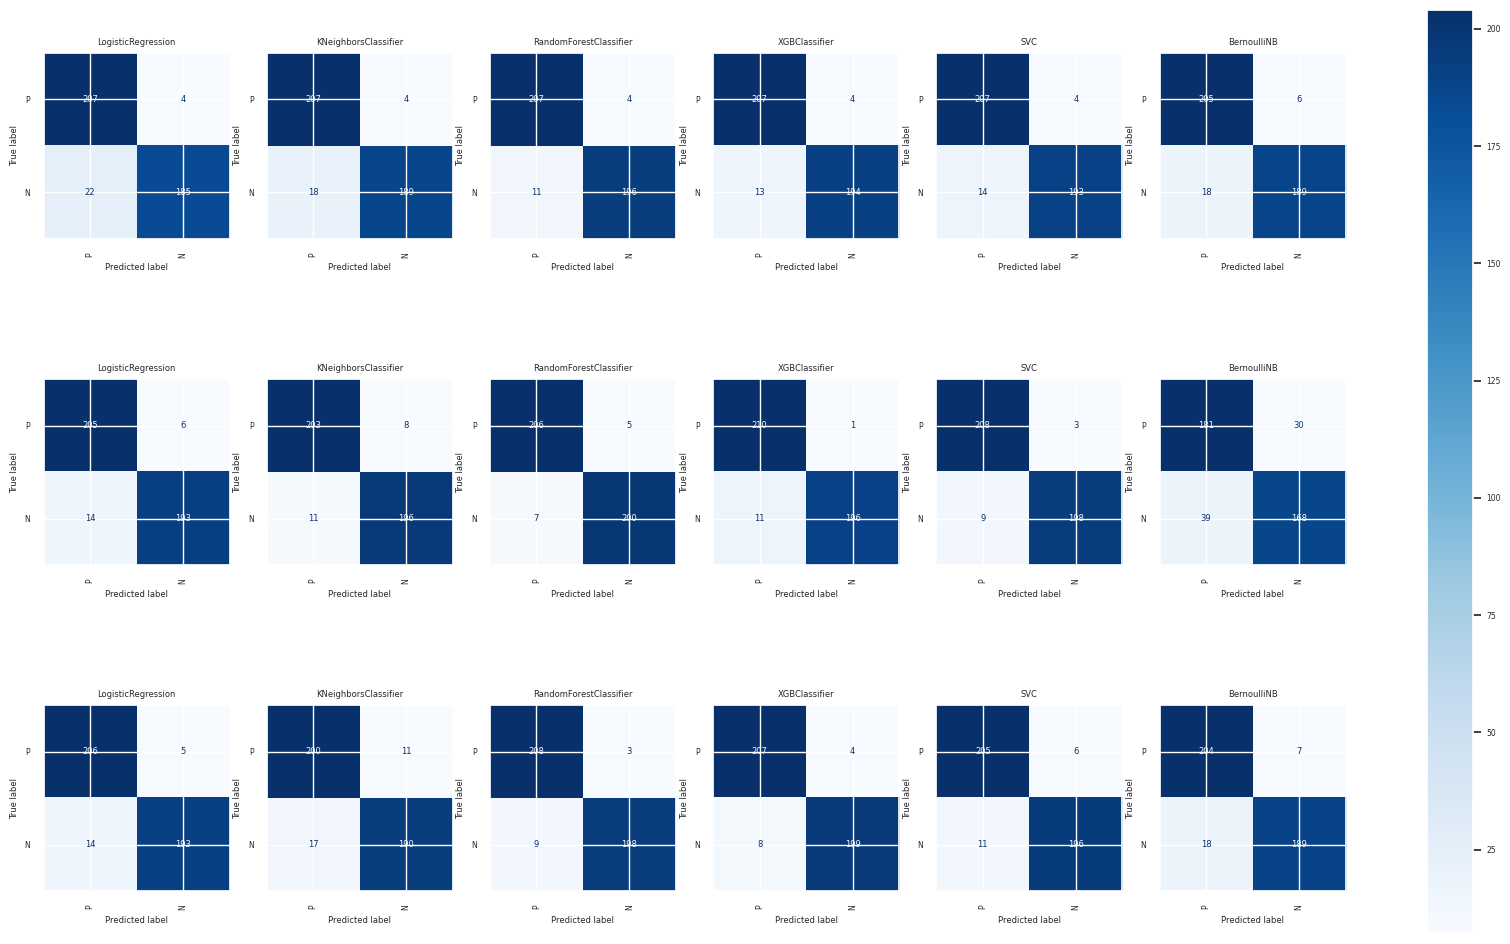

In [69]:
# Figures for subplots
fig, ax = plt.subplots(3, 6, figsize=(21, 12))
fig2, ax2 = plt.subplots(3, 6, figsize=(21, 12))

# Dataframe for stats
output_df = pd.DataFrame(columns=['Model', 'Vectorizer', 'Parameters', 'Accuracy', 'Precision', 'Recall', 'F1'])


# try out all vectorizers
for j, vect in enumerate(vectorizers):

  # apply the vectorizers
  x_train_vectorized = vect.fit_transform(x_train)
  x_test_vectorized = vect.transform(x_test)

  # try out all models
  for i, model in enumerate(models):

    # tune hyperparams with gridsearch
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[i], cv=5, scoring='accuracy')
    grid_search.fit(x_train_vectorized, y_train)

    best_params = grid_search.best_params_
    print(best_params)
    best_score = grid_search.best_score_

    model = grid_search.best_estimator_

    model_string = str(f'{model}'.split('(')[0])
    vect_string = str(f'{vect}'.split('(')[0])

    y_pred = model.predict(x_test_vectorized)

    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = cmd(cf_matrix, display_labels=['P','N'])
    disp.plot(ax=ax2[j,i], xticks_rotation='vertical', cmap='Blues')
    disp.im_.colorbar.remove()
    disp.ax_.set_title(model_string)

    plot_roc_curve(model, y_pred, y_test, ax, j, i, vect_string)

    output_df.loc[len(output_df)] = [model_string, vect_string, best_params, accuracy_score(y_test,y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

fig2.colorbar(disp.im_, ax=ax2)
display(output_df.sort_values(by='Accuracy', ascending=False))

In [78]:
for metric in ['Accuracy', 'Precision', 'Recall', 'F1']:
  print(f'\n\nTop 3 models by {metric}:')
  display(output_df.sort_values(by=metric, ascending=False).head(5)[['Model', 'Vectorizer', metric]])



Top 3 models by Accuracy:


,Model,Vectorizer,Accuracy
9,XGBClassifier,HashingVectorizer,0.971292
14,RandomForestClassifier,TfidfVectorizer,0.971292
8,RandomForestClassifier,HashingVectorizer,0.971292
10,SVC,HashingVectorizer,0.971292
15,XGBClassifier,TfidfVectorizer,0.971292




Top 3 models by Precision:


,Model,Vectorizer,Precision
9,XGBClassifier,HashingVectorizer,0.994924
14,RandomForestClassifier,TfidfVectorizer,0.985075
10,SVC,HashingVectorizer,0.985075
15,XGBClassifier,TfidfVectorizer,0.980296
2,RandomForestClassifier,CountVectorizer,0.980000




Top 3 models by Recall:


,Model,Vectorizer,Recall
8,RandomForestClassifier,HashingVectorizer,0.966184
15,XGBClassifier,TfidfVectorizer,0.961353
10,SVC,HashingVectorizer,0.956522
14,RandomForestClassifier,TfidfVectorizer,0.956522
9,XGBClassifier,HashingVectorizer,0.946860




Top 3 models by F1:


,Model,Vectorizer,F1
8,RandomForestClassifier,HashingVectorizer,0.970874
15,XGBClassifier,TfidfVectorizer,0.970732
14,RandomForestClassifier,TfidfVectorizer,0.970588
10,SVC,HashingVectorizer,0.970588
9,XGBClassifier,HashingVectorizer,0.970297


In [96]:
output_df.iloc[8].Parameters

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}